In [2]:
import torch
import torch.nn as nn  # All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions
import torch.optim as optim  # For all Optimization algorithms, SGD, Adam, etc.
import torchvision.transforms as transforms  # Transformations we can perform on our dataset
import torchvision
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from skimage import io
import torchvision.datasets as dsets
from torch.utils.data import (
    Dataset,
    DataLoader,
)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip "/content/drive/MyDrive/Bangla Digit Recog/Dataset C.zip"

Streaming output truncated to the last 5000 lines.
  inflating: training-c/c19299.png   
  inflating: training-c/c19300.png   
  inflating: training-c/c19301.png   
  inflating: training-c/c19302.png   
  inflating: training-c/c19303.png   
  inflating: training-c/c19304.png   
  inflating: training-c/c19305.png   
  inflating: training-c/c19306.png   
  inflating: training-c/c19307.png   
  inflating: training-c/c19308.png   
  inflating: training-c/c19309.png   
  inflating: training-c/c19310.png   
  inflating: training-c/c19311.png   
  inflating: training-c/c19312.png   
  inflating: training-c/c19313.png   
  inflating: training-c/c19314.png   
  inflating: training-c/c19315.png   
  inflating: training-c/c19316.png   
  inflating: training-c/c19317.png   
  inflating: training-c/c19318.png   
  inflating: training-c/c19319.png   
  inflating: training-c/c19320.png   
  inflating: training-c/c19321.png   
  inflating: training-c/c19322.png   
  inflating: training-c/c19323.png   

In [4]:
class BanglaDigitDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        image = io.imread(img_path)
        y_label = torch.tensor(int(self.annotations.iloc[index, 3]))

        if self.transform:
            image = self.transform(image)

        return (image, y_label)

In [5]:
data = BanglaDigitDataset("/content/training-c.csv","/content/training-c", transforms.Compose([transforms.ToPILImage(), transforms.Resize(size=(28, 28)), transforms.ToTensor()]))
train_set, test_set = torch.utils.data.random_split(data,[19438,4860])

In [6]:
# train_set[0][0].size()
data.__len__()

24298

In [7]:
# Hyperparameters
batch_size = 20
num_iters = 20000
input_dim = 28*28 # num_features = 784
num_hidden = 6
output_dim = 10

learning_rate = 0.01
loss_lst = []
acc_lst = []

num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_set, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, 200)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(200, 200)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(200, 200)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(200, 200)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(200, 200)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(200, 200)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(200, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        # x = x.view(x.shape[0], -1)
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)

        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)

        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)


# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            loss_lst.append(loss.item())
            acc_lst.append(accuracy)
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.3080036640167236. Accuracy: 9.176954732510287
Iteration: 1000. Loss: 2.3225014209747314. Accuracy: 9.279835390946502
Iteration: 1500. Loss: 2.3105788230895996. Accuracy: 9.279835390946502
Iteration: 2000. Loss: 2.314462184906006. Accuracy: 10.781893004115226
Iteration: 2500. Loss: 2.300396680831909. Accuracy: 9.62962962962963
Iteration: 3000. Loss: 2.33229398727417. Accuracy: 9.62962962962963
Iteration: 3500. Loss: 2.3033487796783447. Accuracy: 9.176954732510287
Iteration: 4000. Loss: 2.300664186477661. Accuracy: 9.958847736625515
Iteration: 4500. Loss: 2.3041365146636963. Accuracy: 9.176954732510287
Iteration: 5000. Loss: 2.309898853302002. Accuracy: 9.176954732510287
Iteration: 5500. Loss: 2.3007750511169434. Accuracy: 9.62962962962963
Iteration: 6000. Loss: 2.296421766281128. Accuracy: 10.679012345679013
Iteration: 6500. Loss: 2.279458999633789. Accuracy: 9.176954732510287
Iteration: 7000. Loss: 2.300539493560791. Accuracy: 10.679012345679013
Iteration: 7500.

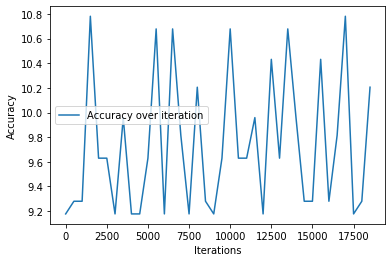

In [8]:
n_itr = np.arange(1,19000,500,int).tolist()
# len(n_itr)
plt.plot(n_itr,acc_lst,'-',label='Accuracy over iteration');
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('acc_iter_ex1.png')
plt.show()

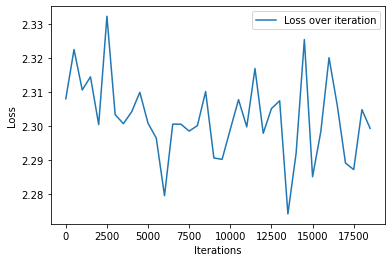

In [9]:
plt.plot(n_itr,loss_lst,'-',label='Loss over iteration');
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.savefig('lss_iter_ex1.png')
plt.show()